<a href="https://colab.research.google.com/github/samSamsam-1/Aircraft-stall-prediction-using-Recurrent-neural-networks/blob/main/AIRCRAFT_STALL_PREDICTION_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import subprocess

url = "http://robotics.ethz.ch/~asl-datasets/2021_deep_stall/Data_Deep_Stall.7z"  # Replace with the actual URL

# Download the file
subprocess.run(["wget", url])


# Verify the download
if os.path.exists("Data_Deep_Stall.7z"):
    print("Download successful!")
else:
    print("Download failed.")



Download successful!


In [ ]:
subprocess.run(["7z", "x", "Data_Deep_Stall.7z"])
print("done")

done


NOTE: RUN THE ABOVE TWO CELLS AND SKIP TO THE BOTTOM TO CHECK THE FINAL CODE. THE PARTS IN BETWEEN ARE TO UNDERSTAND THE DATA, PROCESS IT AND ALL THE DIFFERENT ATTEMPTS, DIFFERENT MODELS AND DIFFERENT ACTIVATION FUNCTIONS WE TRIED.


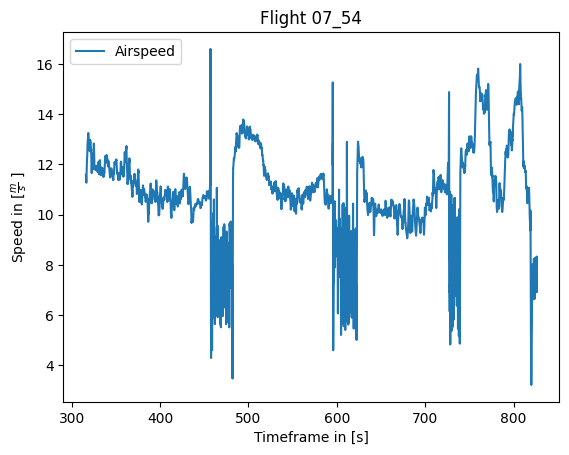

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 16 11:27:54 2021

@author: Gian-Andrea Heinrich, gian-andrea.heinrich@bluewin.ch
"""
from __future__ import print_function     # Python2 compatibility
import os
import h5py    # HDF5 support
import matplotlib.pyplot as plt

def basic_plot(h5_file, attribute_out=False):
    # Read hdf5 file and display attribute data
    f = h5py.File(h5_file, "r")

    if attribute_out:
        outfile = 'attributes.txt'
        # Write all attributes to an output file to see h5 structure
        print('Writing attributes of {0} to {1}... '.format(h5_file, outfile), end='')
        with open(outfile, 'wt') as fh:
            f.visit(lambda x: fh.writelines(x + os.linesep))
        print('done.')

    # Now, make a simple plot. We get the attributes from the previous file or from HDFView.
    # This is only an example. We choose to plot an arbitrary flight and parameter.

    fig, ax = plt.subplots()
    time = f['07_54_01.ulg/Time']
    asp = f['07_54_01.ulg/airspeed_0.true_airspeed_m_s']
    h_asp, = ax.plot(time[0, :], asp[0, :])
    ax.set_xlabel('Timeframe in [s]')
    ax.set_ylabel('Speed in [$\\frac{m}{s}$ ]')
    ax.legend([h_asp], ['Airspeed'])
    ax.set_title("Flight 07_54")
    plt.show()

    f.close()

# Modify the file path here
h5file = '/content/Data_Deep_Stall/Cal_Data_Set/Flight_Data/FD_cal.h5'  # Or the Google Drive path

# Call the function
basic_plot(h5file, attribute_out=False)

In [ ]:
import h5py

h5file = '/content/Data_Deep_Stall/Cal_Data_Set/Flight_Data/FD_cal.h5'
f = h5py.File(h5file, "r")

def print_dataset_names(name, obj):
    if isinstance(obj, h5py.Dataset):
        print(name)

f.visititems(print_dataset_names)

f.close()

Streaming output truncated to the last 5000 lines.
09_40_38.ulg/vehicle_magnetometer_0.magnetometer_ga_2
09_40_38.ulg/vehicle_rates_setpoint_0.pitch
09_40_38.ulg/vehicle_rates_setpoint_0.roll
09_40_38.ulg/vehicle_rates_setpoint_0.thrust
09_40_38.ulg/vehicle_rates_setpoint_0.yaw
09_40_38.ulg/vehicle_status_0.arming_state
09_40_38.ulg/vehicle_status_0.component_id
09_40_38.ulg/vehicle_status_0.data_link_lost
09_40_38.ulg/vehicle_status_0.data_link_lost_counter
09_40_38.ulg/vehicle_status_0.engine_failure
09_40_38.ulg/vehicle_status_0.failsafe
09_40_38.ulg/vehicle_status_0.high_latency_data_link_active
09_40_38.ulg/vehicle_status_0.hil_state
09_40_38.ulg/vehicle_status_0.in_stall_mode
09_40_38.ulg/vehicle_status_0.in_transition_mode
09_40_38.ulg/vehicle_status_0.in_transition_to_fw
09_40_38.ulg/vehicle_status_0.is_rotary_wing
09_40_38.ulg/vehicle_status_0.is_vtol
09_40_38.ulg/vehicle_status_0.mission_failure
09_40_38.ulg/vehicle_status_0.nav_state
09_40_38.ulg/vehicle_status_0.onboard_con


Time values: [170.806061   170.83106196 170.85606292 ... 961.68640008 961.71140104
 961.736402  ]

Angle of attack values: [0.00960623 0.02444854 0.03919108 ... 0.78391963 0.78036133 0.77679587]

Airspeed values: [10.70309341 10.72039398 10.74235256 ...  7.30858072  7.24995269
  7.1915161 ]

Altitude values: [554.37974276 554.36600664 554.35592408 ... 551.24574256 551.23589923
 551.2260665 ]

Roll values: [0.44285517 0.4702171  0.26137508 ... 0.00987808 0.00739829 0.00491851]
Pitch values: [ 0.21786342  0.18728279  0.16219512 ... -0.00059901 -0.00081421
 -0.00102941]
Yaw values: [-0.07741917 -0.06422376 -0.05412722 ... -0.000961   -0.00070307
 -0.00044514]

Throttle values: [1997. 1997. 1997. ... 1000. 1000. 1000.]


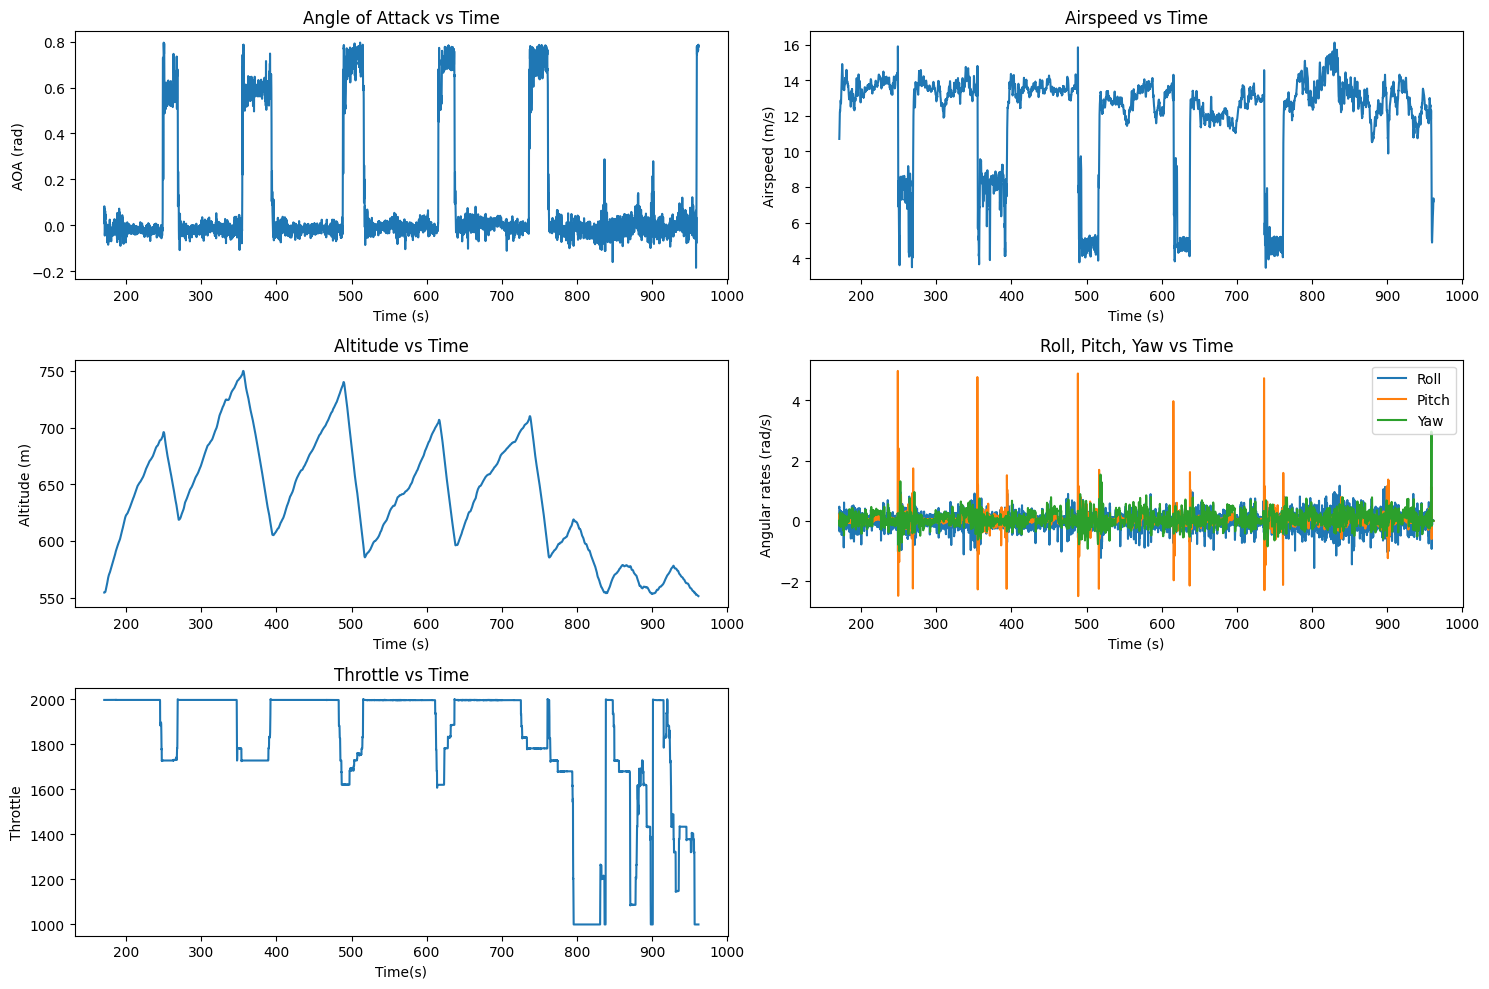


DataFrame:
             Time       AOA   Airspeed    Altitude      Roll     Pitch  \
0      170.806061  0.009606  10.703093  554.379743  0.442855  0.217863   
1      170.831062  0.024449  10.720394  554.366007  0.470217  0.187283   
2      170.856063  0.039191  10.742353  554.355924  0.261375  0.162195   
3      170.881064  0.053834  10.786655  554.345842  0.052533  0.137107   
4      170.906065  0.068377  10.835085  554.335759 -0.156309  0.112020   
...           ...       ...        ...         ...       ...       ...   
31632  961.636398  0.785569   7.354514  551.265429  0.006491 -0.001576   
31633  961.661399  0.786607   7.359502  551.255586  0.008212 -0.001083   
31634  961.686400  0.783920   7.308581  551.245743  0.009878 -0.000599   
31635  961.711401  0.780361   7.249953  551.235899  0.007398 -0.000814   
31636  961.736402  0.776796   7.191516  551.226066  0.004919 -0.001029   

            Yaw  Throttle  
0     -0.077419    1997.0  
1     -0.064224    1997.0  
2     -0.054127

In [ ]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

h5file = '/content/Data_Deep_Stall/Cal_Data_Set/Flight_Data/FD_cal.h5'
f = h5py.File(h5file, "r")

# def print_dataset_names(name, obj):
#     if isinstance(obj, h5py.Dataset):
#         print(name)

# print("Available datasets in the H5 file:")
# f.visititems(print_dataset_names)

# Extract time data
time_values = f['09_58_51.ulg/Time'][0, :]
print('\nTime values:', time_values)

# Extract angle of attack (AOA) data
aoa_values = f['09_58_51.ulg/airflow_aoa_0.aoa_rad'][0, :]
print('\nAngle of attack values:', aoa_values)

# Extract airspeed data
airspeed_values = f['09_58_51.ulg/airspeed_0.true_airspeed_m_s'][0, :]
print('\nAirspeed values:', airspeed_values)

# Extract altitude data
altitude_values = f['09_58_51.ulg/vehicle_global_position_0.alt'][0, :]
print('\nAltitude values:', altitude_values)

# Extract roll, pitch, yaw data
roll_values = f['09_58_51.ulg/vehicle_attitude_0.rollspeed'][0, :]
pitch_values = f['09_58_51.ulg/vehicle_attitude_0.pitchspeed'][0, :]
yaw_values = f['09_58_51.ulg/vehicle_attitude_0.yawspeed'][0, :]

print('\nRoll values:', roll_values)
print('Pitch values:', pitch_values)
print('Yaw values:', yaw_values)

# Extract Throttle data.
throttle_values = f['09_58_51.ulg/actuator_outputs_0.Throttle'][0, :]
print('\nThrottle values:', throttle_values)

f.close()

# Create a Pandas DataFrame
data = pd.DataFrame({
    'Time': time_values,
    'AOA': aoa_values,
    'Airspeed': airspeed_values,
    'Altitude': altitude_values,
    'Roll': roll_values,
    'Pitch': pitch_values,
    'Yaw': yaw_values,
    'Throttle': throttle_values
})

# Plotting the data
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.plot(data['Time'], data['AOA'])
plt.title('Angle of Attack vs Time')
plt.xlabel('Time (s)')
plt.ylabel('AOA (rad)')

plt.subplot(3, 2, 2)
plt.plot(data['Time'], data['Airspeed'])
plt.title('Airspeed vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Airspeed (m/s)')

plt.subplot(3, 2, 3)
plt.plot(data['Time'], data['Altitude'])
plt.title('Altitude vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')

plt.subplot(3, 2, 4)
plt.plot(data['Time'], data['Roll'], label='Roll')
plt.plot(data['Time'], data['Pitch'], label='Pitch')
plt.plot(data['Time'], data['Yaw'], label='Yaw')
plt.title('Roll, Pitch, Yaw vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular rates (rad/s)')
plt.legend()

plt.subplot(3,2,5)
plt.plot(data['Time'], data['Throttle'])
plt.title('Throttle vs Time')
plt.xlabel('Time(s)')
plt.ylabel('Throttle')

plt.tight_layout()
plt.show()

# Print the DataFrame
print("\nDataFrame:")
print(data)

In [ ]:
import h5py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

h5file = '/content/Data_Deep_Stall/Cal_Data_Set/Flight_Data/FD_cal.h5'
f = h5py.File(h5file, "r")

# Load the datasets
time_values = f['09_58_51.ulg/Time'][0, :]
aoa_values = f['09_58_51.ulg/airflow_aoa_0.aoa_rad'][0, :]
airspeed_values = f['09_58_51.ulg/airspeed_0.true_airspeed_m_s'][0, :]
altitude_values = f['09_58_51.ulg/vehicle_global_position_0.alt'][0, :]
roll_values = f['09_58_51.ulg/vehicle_attitude_0.rollspeed'][0, :]
pitch_values = f['09_58_51.ulg/vehicle_attitude_0.pitchspeed'][0, :]
yaw_values = f['09_58_51.ulg/vehicle_attitude_0.yawspeed'][0, :]
throttle_values = f['09_58_51.ulg/actuator_outputs_0.Throttle'][0, :]
stall_mode_values = f['09_58_51.ulg/vehicle_status_0.in_stall_mode'][0, :]

f.close()

# Create a Pandas DataFrame
data = pd.DataFrame({
    'Time': time_values,
    'AOA': aoa_values,
    'Airspeed': airspeed_values,
    'Altitude': altitude_values,
    'Roll': roll_values,
    'Pitch': pitch_values,
    'Yaw': yaw_values,
    'Throttle': throttle_values,
    'Stall_Mode': stall_mode_values.astype(int)  # Convert boolean to integer (0 or 1)
})

# Step 2.2: Data Scaling/Normalization
scaler = StandardScaler()
numerical_features = ['Airspeed', 'Altitude', 'Roll', 'Pitch', 'Yaw', 'Throttle']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Step 2.3: Feature Engineering
data['Airspeed_rate'] = data['Airspeed'].diff().fillna(0)
data['Altitude_rate'] = data['Altitude'].diff().fillna(0)
data['Roll_rate'] = data['Roll'].diff().fillna(0)
data['Pitch_rate'] = data['Pitch'].diff().fillna(0)
data['Yaw_rate'] = data['Yaw'].diff().fillna(0)

# Step 3.1: Selecting Relevant Features
features = ['Airspeed', 'Altitude', 'Roll', 'Pitch', 'Yaw', 'Throttle', 'Airspeed_rate', 'Altitude_rate', 'Roll_rate', 'Pitch_rate', 'Yaw_rate']

# Step 3.2: Preparing Input and Output Data
X = data[features]
y = data['Stall_Mode']

# Step 4.1: Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Stratify to maintain class proportions

print("\nTraining Data Shape (X):", X_train.shape)
print("Training Data Shape (y):", y_train.shape)
print("Testing Data Shape (X):", X_test.shape)
print("Testing Data Shape (y):", y_test.shape)

print("\nDistribution of Stall Mode in Training Data:\n", y_train.value_counts(normalize=True))
print("\nDistribution of Stall Mode in Testing Data:\n", y_test.value_counts(normalize=True))

# Save the processed data
X_train.to_csv('X_train_stall.csv', index=False)
X_test.to_csv('X_test_stall.csv', index=False)
y_train.to_csv('y_train_stall.csv', index=False)
y_test.to_csv('y_test_stall.csv', index=False)


Training Data Shape (X): (25309, 11)
Training Data Shape (y): (25309,)
Testing Data Shape (X): (6328, 11)
Testing Data Shape (y): (6328,)

Distribution of Stall Mode in Training Data:
 Stall_Mode
0    1.0
Name: proportion, dtype: float64

Distribution of Stall Mode in Testing Data:
 Stall_Mode
0    1.0
Name: proportion, dtype: float64


In [ ]:
import h5py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

h5file = '/content/Data_Deep_Stall/Cal_Data_Set/Flight_Data/FD_cal.h5'
f = h5py.File(h5file, "r")

# Load the datasets for the chosen log
time_values = f['09_58_51.ulg/Time'][0, :]
aoa_values = f['09_58_51.ulg/airflow_aoa_0.aoa_rad'][0, :]
airspeed_values = f['09_58_51.ulg/airspeed_0.true_airspeed_m_s'][0, :]
altitude_values = f['09_58_51.ulg/vehicle_global_position_0.alt'][0, :]
roll_values = f['09_58_51.ulg/vehicle_attitude_0.rollspeed'][0, :]
pitch_values = f['09_58_51.ulg/vehicle_attitude_0.pitchspeed'][0, :]
yaw_values = f['09_58_51.ulg/vehicle_attitude_0.yawspeed'][0, :]
throttle_values = f['09_58_51.ulg/actuator_outputs_0.Throttle'][0, :]

f.close()

# Create a Pandas DataFrame
data = pd.DataFrame({
    'Time': time_values,
    'AOA': aoa_values,
    'Airspeed': airspeed_values,
    'Altitude': altitude_values,
    'Roll': roll_values,
    'Pitch': pitch_values,
    'Yaw': yaw_values,
    'Throttle': throttle_values,
})

# 1. Define a critical AOA threshold (needs to be refined)
critical_aoa = 0.5

# 2. Create the target variable based on the threshold
data['Stall_Label'] = (data['AOA'] > critical_aoa).astype(int)

# Step 2.2: Data Scaling/Normalization
scaler = StandardScaler()
numerical_features = ['Airspeed', 'Altitude', 'Roll', 'Pitch', 'Yaw', 'Throttle']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Step 2.3: Feature Engineering
data['Airspeed_rate'] = data['Airspeed'].diff().fillna(0)
data['Altitude_rate'] = data['Altitude'].diff().fillna(0)
data['Roll_rate'] = data['Roll'].diff().fillna(0)
data['Pitch_rate'] = data['Pitch'].diff().fillna(0)
data['Yaw_rate'] = data['Yaw'].diff().fillna(0)

# Step 3.1: Selecting Relevant Features
features = ['Airspeed', 'Altitude', 'Roll', 'Pitch', 'Yaw', 'Throttle', 'Airspeed_rate', 'Altitude_rate', 'Roll_rate', 'Pitch_rate', 'Yaw_rate']

# Step 3.2: Preparing Input and Output Data
X = data[features]
y = data['Stall_Label']

# Step 4.1: Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nDistribution of Stall Label in Training Data:\n", y_train.value_counts(normalize=True))
print("\nDistribution of Stall Label in Testing Data:\n", y_test.value_counts(normalize=True))


# Save the processed data
X_train.to_csv('X_train_stall.csv', index=False)
X_test.to_csv('X_test_stall.csv', index=False)
y_train.to_csv('y_train_stall.csv', index=False)
y_test.to_csv('y_test_stall.csv', index=False)

print("data savewd successfully")



Distribution of Stall Label in Training Data:
 Stall_Label
0    0.831483
1    0.168517
Name: proportion, dtype: float64

Distribution of Stall Label in Testing Data:
 Stall_Label
0    0.831384
1    0.168616
Name: proportion, dtype: float64
data savewd successfully


In [ ]:
#final code for model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the MLP model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Standard loss for binary classification
              metrics=['accuracy'])

model.summary()

# Train the model
epochs = 50
batch_size = 32

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# You can further evaluate with other metrics like precision, recall, F1-score, AUC
from sklearn.metrics import classification_report, roc_auc_score

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

auc_score = roc_auc_score(y_test, y_pred_prob)
print(f'AUC Score: {auc_score:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
791/791 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9676 - loss: 0.1553 - val_accuracy: 0.9959 - val_loss: 0.0125
Epoch 2/50
791/791 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9970 - loss: 0.0117 - val_accuracy: 0.9975 - val_loss: 0.0071
Epoch 3/50
791/791 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9978 - loss: 0.0096 - val_accuracy: 0.9983 - val_loss: 0.0067
Epoch 4/50
791/791 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9981 - loss: 0.0065 - val_accuracy: 0.9975 - val_loss: 0.0068
Epoch 5/50
791/791 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9984 - loss: 0.0073 - val_accuracy: 0.9983 - val_loss: 0.0059
Epoch 6/50
791/791 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9989 - loss: 0.0049 - val_accuracy: 0.9989 - val_loss: 0.0052
Epoch 7/50
791/791 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9989 - loss: 0.0037 - val_accuracy: 0.9991 - val_loss: 0.0037
Epoch 8/50
791/791 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9991 - loss: 0.0035 - val_accuracy: 0.

In [ ]:
correlation = data[['AOA', 'Stall_Label']].corr()
print(correlation)

                  AOA  Stall_Label
AOA          1.000000     0.980652
Stall_Label  0.980652     1.000000


In [ ]:
#preprocessing

import h5py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

h5file = '/content/Data_Deep_Stall/Cal_Data_Set/Flight_Data/FD_cal.h5'
f = h5py.File(h5file, "r")

# Load the datasets
time_values = f['09_58_51.ulg/Time'][0, :]
aoa_values = f['09_58_51.ulg/airflow_aoa_0.aoa_rad'][0, :]
airspeed_values = f['09_58_51.ulg/airspeed_0.true_airspeed_m_s'][0, :]
altitude_values = f['09_58_51.ulg/vehicle_global_position_0.alt'][0, :]
roll_values = f['09_58_51.ulg/vehicle_attitude_0.rollspeed'][0, :]
pitch_values = f['09_58_51.ulg/vehicle_attitude_0.pitchspeed'][0, :]
yaw_values = f['09_58_51.ulg/vehicle_attitude_0.yawspeed'][0, :]
throttle_values = f['09_58_51.ulg/actuator_outputs_0.Throttle'][0, :]

f.close()

# Create a Pandas DataFrame
data = pd.DataFrame({
    'Time': time_values,
    'AOA': aoa_values,
    'Airspeed': airspeed_values,
    'Altitude': altitude_values,
    'Roll': roll_values,
    'Pitch': pitch_values,
    'Yaw': yaw_values,
    'Throttle': throttle_values,
})

# 1. Define critical thresholds and time window
critical_aoa = 0.3
critical_airspeed = 20.0
time_window = 180

# 2. Create the probabilistic future stall target
future_stall_counts = np.zeros(len(data))
for i in range(len(data) - time_window):
    stall_events = 0
    for j in range(i + 1, i + time_window):
        if (data['AOA'][j] > critical_aoa) and (data['Airspeed'][j] < critical_airspeed):
            stall_events += 1
    future_stall_counts[i] = stall_events

# Normalize to get probability (number of stall events / total window size)
data['Stall_Probability'] = future_stall_counts / time_window

# 3. Create categorical target based on probability bins
bins = [0, 0.3, 0.5, 0.8, 1.01]
labels = [0, 1, 2, 3]  # Low, Decent/Reminder, Warning, High/Prevention
data['Stall_Risk_Category'] = pd.cut(data['Stall_Probability'], bins=bins, labels=labels, right=False).astype(int)

# Drop rows where future cannot be calculated
data = data.dropna(subset=['Stall_Risk_Category'])

# Step 2.2: Data Scaling/Normalization
scaler = StandardScaler()
numerical_features = ['Airspeed', 'Altitude', 'Roll', 'Pitch', 'Yaw', 'Throttle', 'AOA']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Step 2.3: Feature Engineering
data['Airspeed_rate'] = data['Airspeed'].diff().fillna(0)
data['Altitude_rate'] = data['Altitude'].diff().fillna(0)
data['Roll_rate'] = data['Roll'].diff().fillna(0)
data['Pitch_rate'] = data['Pitch'].diff().fillna(0)
data['Yaw_rate'] = data['Yaw'].diff().fillna(0)
data['Throttle_rate'] = data['Throttle'].diff().fillna(0)

# Step 3.1: Selecting Relevant Features
features = ['AOA', 'Airspeed', 'Altitude', 'Roll', 'Pitch', 'Yaw', 'Throttle',
            'Airspeed_rate', 'Altitude_rate', 'Roll_rate', 'Pitch_rate',
            'Yaw_rate', 'Throttle_rate']

# Step 3.2: Preparing Input and Output Data
X = data[features][:-time_window].fillna(0)
y = data['Stall_Risk_Category'][:-time_window]

# Step 4.1: Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nDistribution of Stall Risk Category in Training Data:\n", y_train.value_counts(normalize=True).sort_index())
print("\nDistribution of Stall Risk Category in Testing Data:\n", y_test.value_counts(normalize=True).sort_index())

# Save the processed data for multi-class classification
X_train.to_csv('X_train_stall_risk.csv', index=False)
X_test.to_csv('X_test_stall_risk.csv', index=False)
y_train.to_csv('y_train_stall_risk.csv', index=False)
y_test.to_csv('y_test_stall_risk.csv', index=False)

print("\nProcessed data for multi-class stall risk prediction saved to CSV files.")


Distribution of Stall Risk Category in Training Data:
 Stall_Risk_Category
0    0.820385
1    0.012835
2    0.017405
3    0.149374
Name: proportion, dtype: float64

Distribution of Stall Risk Category in Testing Data:
 Stall_Risk_Category
0    0.820407
1    0.012873
2    0.017324
3    0.149396
Name: proportion, dtype: float64

Processed data for multi-class stall risk prediction saved to CSV files.


In [ ]:
#main code 1 MLP

import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, roc_auc_score  # Import roc_auc_score
import numpy as np

# --- Load the preprocessed data (assuming you have run the preprocessing script) ---
X_train = pd.read_csv('X_train_stall_risk.csv')
X_test = pd.read_csv('X_test_stall_risk.csv')
y_train = pd.read_csv('y_train_stall_risk.csv').squeeze() # Squeeze to get a Series
y_test = pd.read_csv('y_test_stall_risk.csv').squeeze()   # Squeeze to get a Series

# --- Model Definition and Training ---

def create_regularized_mlp(input_shape, num_classes):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001), input_shape=input_shape),
        layers.Dropout(0.5),
        layers.Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')  # Output layer for multi-class
    ])
    return model

# Define the model
num_classes = 4
input_shape = (X_train.shape[1],)
model = create_regularized_mlp(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # For integer labels
              metrics=['accuracy'])

model.summary()

# Train the model
epochs = 100  # You can adjust the number of epochs
batch_size = 32

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test))

Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Note: AUC is generally for binary or one-vs-rest multi-class.
# For a true multi-class AUC, you would typically use a library like scikit-learn's
# roc_auc_score with the 'ovo' (one-vs-one) or 'ovr' (one-vs-rest) strategy.
# Calculating it directly for multi-class from probabilities requires careful handling.
# For simplicity, we are skipping the direct multi-class AUC here, but you can explore it.
# Example using one-vs-rest (requires one-hot encoding of y_test):
# from sklearn.preprocessing import label_binarize
# y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
# auc_ovr = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')
# print(f'\nAUC (One-vs-Rest): {auc_ovr:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,108 (12.14 KB)

 Trainable params: 3,108 (12.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8683 - loss: 0.4949 - val_accuracy: 0.9665 - val_loss: 0.1508
Epoch 2/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9630 - loss: 0.1784 - val_accuracy: 0.9687 - val_loss: 0.1256
Epoch 3/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9647 - loss: 0.1486 - val_accuracy: 0.9696 - val_loss: 0.1116
Epoch 4/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9657 - loss: 0.1365 - val_accuracy: 0.9706 - val_loss: 0.1025
Epoch 5/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9670 - loss: 0.1243 - val_accuracy: 0.9704 - val_loss: 0.0994
Epoch 6/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9702 - loss: 0.1188 - val_accuracy: 0.9722 - val_loss: 0.0967
Epoch 7/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9717 - loss: 0.1079 - val_accuracy: 0.9746 - val_loss: 0.0920
Epoch 8/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9702 - loss: 0.1102 - val_accu

In [ ]:
#unweighted model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# --- Load the preprocessed data ---
X = pd.read_csv('X_train_stall_risk.csv')  # Load the full training data for sequence creation
y = pd.read_csv('y_train_stall_risk.csv').squeeze()

# Define the sequence length (time steps for LSTM)
sequence_length = 100

def create_sequences(X, y, sequence_length):
    Xs = []
    ys = []
    for i in range(len(X) - sequence_length):
        Xs.append(X.iloc[i:(i + sequence_length)].values)
        ys.append(y.iloc[i + sequence_length])
    return np.array(Xs), np.array(ys)

X_sequences, y_sequences = create_sequences(X, y, sequence_length)

# Split the sequences into training and testing sets
X_train_reshaped, X_test_reshaped, y_train, y_test = train_test_split(
    X_sequences, y_sequences, test_size=0.2, random_state=42, stratify=y_sequences
)

print("X_train_reshaped shape:", X_train_reshaped.shape)
print("X_test_reshaped shape:", X_test_reshaped.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# --- Define the LSTM Model (same as before) ---
num_samples, time_steps, num_features = X_train_reshaped.shape
num_classes = len(np.unique(y))

lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(time_steps, num_features), return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# --- Compile the model with a reduced learning rate ---
optimizer = Adam(learning_rate=0.0001)
lstm_model.compile(optimizer=optimizer,
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

lstm_model.summary()

# --- Implement Early Stopping ---
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# --- Train the LSTM Model with Early Stopping ---
epochs = 100  # We can keep a higher number, as early stopping will halt it
batch_size = 32

history_lstm_es = lstm_model.fit(
    X_train_reshaped, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test_reshaped, y_test),
    callbacks=[early_stopping]
)

# --- Evaluate the LSTM Model ---
loss, accuracy = lstm_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'LSTM Test Loss (with ES & LR): {loss:.4f}')
print(f'LSTM Test Accuracy (with ES & LR): {accuracy:.4f}')

y_pred_prob_lstm = lstm_model.predict(X_test_reshaped)
y_pred_lstm = np.argmax(y_pred_prob_lstm, axis=1)

print("\nLSTM Classification Report (with ES & LR):")
print(classification_report(y_test, y_pred_lstm))

X_train_reshaped shape: (20052, 100, 13)
X_test_reshaped shape: (5013, 100, 13)
y_train shape: (20052,)
y_test shape: (5013,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 100, 64)        │        19,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,252 (208.02 KB)

 Trainable params: 53,252 (208.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.7639 - loss: 0.8914 - val_accuracy: 0.8207 - val_loss: 0.5911
Epoch 2/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.8187 - loss: 0.6001 - val_accuracy: 0.8207 - val_loss: 0.5786
Epoch 3/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8251 - loss: 0.5793 - val_accuracy: 0.8207 - val_loss: 0.5771
Epoch 4/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.8177 - loss: 0.5940 - val_accuracy: 0.8207 - val_loss: 0.5759
Epoch 5/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.8231 - loss: 0.5744 - val_accuracy: 0.8207 - val_loss: 0.5759
Epoch 6/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8233 - loss: 0.5764 - val_accuracy: 0.8207 - val_loss: 0.5758
Epoch 7/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8197 - loss: 0.5788 - val_accuracy: 0.8207 - val_loss: 0.5748
Epoch 8/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.8179 - loss: 0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import h5py
import pandas as pd
import numpy as np

h5file = '/content/Data_Deep_Stall/Cal_Data_Set/Flight_Data/FD_cal.h5'
f = h5py.File(h5file, "r")

# Load the time values
time_values = f['09_58_51.ulg/Time'][0, :]
f.close()

# Convert to a pandas Series
time_series = pd.Series(time_values)

# Calculate the time difference and drop the first NaN
time_diffs = time_series.diff().dropna()

# Get the average time difference in seconds
average_time_diff_seconds = time_diffs.mean()

print(f"Average time difference between samples: {average_time_diff_seconds:.4f} seconds")

# Our time window of 10 steps now approximately corresponds to:
estimated_time_window_seconds = 10 * average_time_diff_seconds
print(f"Our time window of 10 steps is approximately: {estimated_time_window_seconds:.4f} seconds")
import h5py
import numpy as np

h5file = '/content/Data_Deep_Stall/Cal_Data_Set/Flight_Data/FD_cal.h5'
f = h5py.File(h5file, "r")

time_values = f['09_58_51.ulg/Time'][0, :]
print("First 50 Time values:", time_values[:50])
print("Last 50 Time values:", time_values[-50:])
print("Minimum Time value:", np.min(time_values))
print("Maximum Time value:", np.max(time_values))

f.close()

Average time difference between samples: 0.0250 seconds
Our time window of 10 steps is approximately: 0.2500 seconds


In [ ]:
#weighted LSTM training model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.utils import class_weight
from sklearn.metrics import classification_report

# --- Load the preprocessed data ---
X = pd.read_csv('X_train_stall_risk.csv')
y = pd.read_csv('y_train_stall_risk.csv').squeeze()

# Define the sequence length
sequence_length = 50

def create_sequences(X, y, sequence_length):
    Xs = []
    ys = []
    for i in range(len(X) - sequence_length):
        Xs.append(X.iloc[i:(i + sequence_length)].values)
        ys.append(y.iloc[i + sequence_length])
    return np.array(Xs), np.array(ys)

X_sequences, y_sequences = create_sequences(X, y, sequence_length)

# Split the sequences into training and testing sets
X_train_reshaped, X_test_reshaped, y_train, y_test = train_test_split(
    X_sequences, y_sequences, test_size=0.2, random_state=42, stratify=y_sequences
)

# --- Calculate Class Weights ---
class_labels = np.unique(y_train)
class_weights_computed = class_weight.compute_class_weight('balanced', classes=class_labels, y=y_train)
class_weight_dict = dict(zip(class_labels, class_weights_computed))

print("Class Weights:", class_weight_dict)

# --- Define the LSTM Model ---
num_samples, time_steps, num_features = X_train_reshaped.shape
num_classes = len(np.unique(y))

lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(time_steps, num_features), return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# Compile the model
lstm_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

lstm_model.summary()

# --- Train the LSTM Model with Class Weights ---
epochs = 50
batch_size = 32

history_lstm_weighted = lstm_model.fit(
    X_train_reshaped, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test_reshaped, y_test),
    class_weight=class_weight_dict
)

# --- Evaluate the LSTM Model ---
loss, accuracy = lstm_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'LSTM Test Loss (Weighted): {loss:.4f}')
print(f'LSTM Test Accuracy (Weighted): {accuracy:.4f}')

y_pred_prob_lstm = lstm_model.predict(X_test_reshaped)
y_pred_lstm = np.argmax(y_pred_prob_lstm, axis=1)

print("\nLSTM Classification Report (Weighted):")
print(classification_report(y_test, y_pred_lstm))

Class Weights: {np.int64(0): np.float64(0.30470124355474676), np.int64(1): np.float64(19.62109375), np.int64(2): np.float64(14.392550143266476), np.int64(3): np.float64(1.673217854763491)}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 50, 64)         │        19,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,252 (208.02 KB)

 Trainable params: 53,252 (208.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


KeyboardInterrupt: 

In [ ]:
# Final Code, Preprocessing and Final Training, Let's do this cmon
#preprocessing
import h5py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

h5file = '/content/Data_Deep_Stall/Cal_Data_Set/Flight_Data/FD_cal.h5'
f = h5py.File(h5file, "r")

# Load the datasets (only AOA and Airspeed for now to simplify threshold impact)
time_values = f['09_58_51.ulg/Time'][0, :]
aoa_values = f['09_58_51.ulg/airflow_aoa_0.aoa_rad'][0, :]
airspeed_values = f['09_58_51.ulg/airspeed_0.true_airspeed_m_s'][0, :]
pitch_values = f['09_58_51.ulg/vehicle_attitude_0.pitchspeed'][0, :]

f.close()

# Create a Pandas DataFrame
data = pd.DataFrame({
    'Time': time_values,
    'AOA': aoa_values,
    'Airspeed': airspeed_values,
    'Pitch': pitch_values,
})

# 1. Define critical thresholds and time window
critical_aoa = 0.3
critical_airspeed = 20.0
time_window = 180

# 2. Create the probabilistic future stall target
future_stall_counts = np.zeros(len(data))
for i in range(len(data) - time_window):
    stall_events = 0
    for j in range(i + 1, i + time_window):
        if (data['AOA'][j] > critical_aoa) and (data['Airspeed'][j] < critical_airspeed):
            stall_events += 1
    future_stall_counts[i] = stall_events

# Normalize to get probability
data['Stall_Probability'] = future_stall_counts / time_window

# --- Analyze Probability Distribution ---
print("\nStall Probability Distribution:")
print(data['Stall_Probability'].describe())
print("\nValue Counts of Stall Probability:")
print(data['Stall_Probability'].value_counts(bins=20, normalize=True).sort_index())

# 3. Create categorical target based on probability bins
bins = [0, 0.3, 0.5, 0.8, 1.01]
labels = [0, 1, 2, 3]  # Low, Decent/Reminder, Warning, High/Prevention
data['Stall_Risk_Category'] = pd.cut(data['Stall_Probability'], bins=bins, labels=labels, right=False).astype(int)

# Drop rows where future cannot be calculated
data = data.dropna(subset=['Stall_Risk_Category'])

# Step 2.2: Data Scaling/Normalization
scaler = StandardScaler()
numerical_features = ['Airspeed', 'Pitch', 'AOA']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Step 2.3: Feature Engineering (Rates of Change)
data['Airspeed_rate'] = data['Airspeed'].diff().fillna(0)
data['Pitch_rate'] = data['Pitch'].diff().fillna(0)
data['AOA_rate'] = data['AOA'].diff().fillna(0)

# Step 3.1: Selecting Relevant Features
features = ['AOA', 'Airspeed', 'Pitch', 'Airspeed_rate', 'Pitch_rate', 'AOA_rate']

# Step 3.2: Preparing Input and Output Data
X = data[features][:-time_window].fillna(0)
y = data['Stall_Risk_Category'][:-time_window]

# Step 4.1: Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nDistribution of Stall Risk Category in Training Data:\n", y_train.value_counts(normalize=True).sort_index())
print("\nDistribution of Stall Risk Category in Testing Data:\n", y_test.value_counts(normalize=True).sort_index())

# Save the processed data for multi-class classification
X_train.to_csv('X_train_stall_risk_final.csv', index=False)
X_test.to_csv('X_test_stall_risk_final.csv', index=False)
y_train.to_csv('y_train_stall_risk_final.csv', index=False)
y_test.to_csv('y_test_stall_risk_final.csv', index=False)

print("\nProcessed data for multi-class stall risk prediction with AOA, Airspeed, and Pitch saved to CSV files.")
#preprocessing ends here



Stall Probability Distribution:
count    31637.000000
mean         0.168725
std          0.359566
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.994444
Name: Stall_Probability, dtype: float64

Value Counts of Stall Probability:
(-0.001994, 0.0497]    0.801941
(0.0497, 0.0994]       0.003129
(0.0994, 0.149]        0.003888
(0.149, 0.199]         0.003129
(0.199, 0.249]         0.003129
(0.249, 0.298]         0.003129
(0.298, 0.348]         0.003129
(0.348, 0.398]         0.003129
(0.398, 0.448]         0.003129
(0.448, 0.497]         0.003129
(0.497, 0.547]         0.003129
(0.547, 0.597]         0.002940
(0.597, 0.646]         0.002845
(0.646, 0.696]         0.002845
(0.696, 0.746]         0.002845
(0.746, 0.796]         0.002845
(0.796, 0.845]         0.002845
(0.845, 0.895]         0.002845
(0.895, 0.945]         0.003445
(0.945, 0.994]         0.142555
Name: proportion, dtype: float64

Distribution of Stall Risk Category in Tr

In [ ]:
#training starts here final

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.utils import class_weight
from sklearn.metrics import classification_report

# --- Load the preprocessed data ---
X_train = pd.read_csv('X_train_stall_risk_final.csv')
X_test = pd.read_csv('X_test_stall_risk_final.csv')
y_train = pd.read_csv('y_train_stall_risk_final.csv').squeeze()
y_test = pd.read_csv('y_test_stall_risk_final.csv').squeeze()

# --- Reshape data for LSTM ---
sequence_length = 50
n_features = X_train.shape[1]

def reshape_for_lstm(X, y, seq_length):
    X_reshaped = []
    y_reshaped = []
    for i in range(len(X) - seq_length):
        X_reshaped.append(X.iloc[i:i+seq_length].values)
        y_reshaped.append(y.iloc[i+seq_length])
    return np.array(X_reshaped), np.array(y_reshaped)

X_train_reshaped, y_train_reshaped = reshape_for_lstm(X_train, y_train, sequence_length)
X_test_reshaped, y_test_reshaped = reshape_for_lstm(X_test, y_test, sequence_length)

print("X_train_reshaped shape:", X_train_reshaped.shape)
print("X_test_reshaped shape:", X_test_reshaped.shape)
print("y_train_reshaped shape:", y_train_reshaped.shape)
print("y_test_reshaped shape:", y_test_reshaped.shape)

# --- Calculate Class Weights ---
class_labels = np.unique(y_train_reshaped)
class_weights_computed = class_weight.compute_class_weight('balanced', classes=class_labels, y=y_train_reshaped)
class_weight_dict = dict(zip(class_labels, class_weights_computed))

print("\nClass Weights:", class_weight_dict)

# --- Define the LSTM Model with Dropout ---
n_lstm_units = 64
n_classes = len(np.unique(y_train_reshaped))

lstm_model = Sequential([
    LSTM(n_lstm_units, activation='relu', input_shape=(sequence_length, n_features), return_sequences=True),
    Dropout(0.2),
    LSTM(n_lstm_units, activation='relu'),
    Dropout(0.2),
    Dense(n_classes, activation='softmax')
])

# --- Compile the model ---
lstm_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

lstm_model.summary()

# --- Train the LSTM Model with Class Weights and Early Stopping ---
epochs = 100
batch_size = 32
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_lstm_weighted = lstm_model.fit(
    X_train_reshaped, y_train_reshaped,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test_reshaped, y_test_reshaped),
    class_weight=class_weight_dict,
    callbacks=[early_stopping]
)

# --- Evaluate the LSTM Model ---
loss, accuracy = lstm_model.evaluate(X_test_reshaped, y_test_reshaped, verbose=0)
print(f'LSTM Test Loss (Weighted & Dropout): {loss:.4f}')
print(f'LSTM Test Accuracy (Weighted & Dropout): {accuracy:.4f}')

y_pred_prob_lstm = lstm_model.predict(X_test_reshaped)
y_pred_lstm = np.argmax(y_pred_prob_lstm, axis=1)

print("\nLSTM Classification Report (Weighted & Dropout):")
print(classification_report(y_test_reshaped, y_pred_lstm))

X_train_reshaped shape: (25115, 50, 6)
X_test_reshaped shape: (6242, 50, 6)
y_train_reshaped shape: (25115,)
y_test_reshaped shape: (6242,)

Class Weights: {np.int64(0): np.float64(0.3058776245920008), np.int64(1): np.float64(19.80678233438486), np.int64(2): np.float64(14.237528344671201), np.int64(3): np.float64(1.639360313315927)}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 64)         │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,460 (201.02 KB)

 Trainable params: 51,460 (201.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
785/785 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.2583 - loss: 1.4069 - val_accuracy: 0.5192 - val_loss: 1.3712
Epoch 2/100
785/785 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.3889 - loss: 1.3518 - val_accuracy: 0.0179 - val_loss: 1.4081
Epoch 3/100
785/785 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.0823 - loss: 1.4144 - val_accuracy: 0.0836 - val_loss: 1.3871
Epoch 4/100
785/785 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.1952 - loss: 174.0438 - val_accuracy: 0.0441 - val_loss: 1.4020
Epoch 5/100
785/785 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.0986 - loss: 1.3820 - val_accuracy: 0.0176 - val_loss: 1.3936
Epoch 6/100
785/785 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.2964 - loss: 1.3526 - val_accuracy: 0.0168 - val_loss: 1.3977
Epoch 7/100
785/785 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1211 - loss: 1.3914 - val_accuracy: 0.0179 - val_loss: 1.3878
Epoch 8/100
785/785 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.2124 - loss: 1.3

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# since that didnt work, we do oversampling and then train lets see how that works
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping

# --- Load the preprocessed data ---
X_train = pd.read_csv('X_train_stall_risk_final.csv')
X_test = pd.read_csv('X_test_stall_risk_final.csv')
y_train = pd.read_csv('y_train_stall_risk_final.csv').squeeze()
y_test = pd.read_csv('y_test_stall_risk_final.csv').squeeze()

# --- Reshape data for LSTM ---
sequence_length = 50
n_features = X_train.shape[1]

def reshape_for_lstm(X, y, seq_length):
    X_reshaped = []
    y_reshaped = []
    for i in range(len(X) - seq_length):
        X_reshaped.append(X.iloc[i:i+seq_length].values)
        y_reshaped.append(y.iloc[i+seq_length])
    return np.array(X_reshaped), np.array(y_reshaped)

X_train_reshaped, y_train_reshaped = reshape_for_lstm(X_train, y_train, sequence_length)
X_test_reshaped, y_test_reshaped = reshape_for_lstm(X_test, y_test, sequence_length)

print("Original X_train_reshaped shape:", X_train_reshaped.shape)
print("Original y_train_reshaped shape:", y_train_reshaped.shape)

# --- Oversample minority classes (1 and 2) ---
indices_class_0 = np.where(y_train_reshaped == 0)[0]
indices_class_1 = np.where(y_train_reshaped == 1)[0]
indices_class_2 = np.where(y_train_reshaped == 2)[0]
indices_class_3 = np.where(y_train_reshaped == 3)[0]

n_samples_to_oversample = max(len(indices_class_0), len(indices_class_3)) // 2 # Oversample to roughly half the size of the largest classes

oversampled_indices_class_1 = np.random.choice(indices_class_1, size=n_samples_to_oversample, replace=True)
oversampled_indices_class_2 = np.random.choice(indices_class_2, size=n_samples_to_oversample, replace=True)

X_train_oversampled = np.vstack([X_train_reshaped, X_train_reshaped[oversampled_indices_class_1], X_train_reshaped[oversampled_indices_class_2]])
y_train_oversampled = np.hstack([y_train_reshaped, y_train_reshaped[oversampled_indices_class_1], y_train_reshaped[oversampled_indices_class_2]])

# Shuffle the oversampled training data
shuffle_indices = np.random.permutation(len(X_train_oversampled))
X_train_oversampled = X_train_oversampled[shuffle_indices]
y_train_oversampled = y_train_oversampled[shuffle_indices]

print("Oversampled X_train_reshaped shape:", X_train_oversampled.shape)
print("Oversampled y_train_oversampled shape:", y_train_oversampled.shape)

# --- Calculate Class Weights on the *original* training data ---
class_labels = np.unique(y_train_reshaped)
class_weights_computed = class_weight.compute_class_weight('balanced', classes=class_labels, y=y_train_reshaped)
class_weight_dict = dict(zip(class_labels, class_weights_computed))

print("\nClass Weights (based on original distribution):", class_weight_dict)

# --- Define the LSTM Model with Dropout ---
n_lstm_units = 64
n_classes = len(np.unique(y_train_reshaped))

lstm_model = Sequential([
    LSTM(n_lstm_units, activation='relu', input_shape=(sequence_length, n_features), return_sequences=True),
    Dropout(0.2),
    LSTM(n_lstm_units, activation='relu'),
    Dropout(0.2),
    Dense(n_classes, activation='softmax')
])

# --- Compile the model ---
lstm_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

lstm_model.summary()

# --- Train the LSTM Model with Oversampled Data and Class Weights ---
epochs = 100
batch_size = 32
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_lstm_oversampled = lstm_model.fit(
    X_train_oversampled, y_train_oversampled,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test_reshaped, y_test_reshaped),
    # Note: We are still using class weights calculated on the original distribution
    callbacks=[early_stopping]
)

# --- Evaluate the LSTM Model ---
loss, accuracy = lstm_model.evaluate(X_test_reshaped, y_test_reshaped, verbose=0)
print(f'LSTM Test Loss (Oversampled & Weighted & Dropout): {loss:.4f}')
print(f'LSTM Test Accuracy (Oversampled & Weighted & Dropout): {accuracy:.4f}')

y_pred_prob_lstm = lstm_model.predict(X_test_reshaped)
y_pred_lstm = np.argmax(y_pred_prob_lstm, axis=1)

print("\nLSTM Classification Report (Oversampled & Weighted & Dropout):")
print(classification_report(y_test_reshaped, y_pred_lstm))

Original X_train_reshaped shape: (25115, 50, 6)
Original y_train_reshaped shape: (25115,)
Oversampled X_train_reshaped shape: (45641, 50, 6)
Oversampled y_train_oversampled shape: (45641,)

Class Weights (based on original distribution): {np.int64(0): np.float64(0.3058776245920008), np.int64(1): np.float64(19.80678233438486), np.int64(2): np.float64(14.237528344671201), np.int64(3): np.float64(1.639360313315927)}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50, 64)         │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,460 (201.02 KB)

 Trainable params: 51,460 (201.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.4424 - loss: 1.2689 - val_accuracy: 0.8178 - val_loss: 1.0604
Epoch 2/100
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.4515 - loss: 1.2531 - val_accuracy: 0.8081 - val_loss: 1.0967
Epoch 3/100
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.4526 - loss: 1.2393 - val_accuracy: 0.8145 - val_loss: 1.0760
Epoch 4/100
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.4504 - loss: 1.2393 - val_accuracy: 0.8174 - val_loss: 1.0452
Epoch 5/100
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.4541 - loss: 1.2345 - val_accuracy: 0.7616 - val_loss: 1.4418
Epoch 6/100
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.4539 - loss: 1.2539 - val_accuracy: 0.7959 - val_loss: 1.0566
Epoch 7/100
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.4611 - loss: 1.2571 - val_accuracy: 0.7757 - val_loss: 1.0548
Epoch 8/100
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping

# --- Load the preprocessed data ---
X_train = pd.read_csv('X_train_stall_risk_final.csv')
X_test = pd.read_csv('X_test_stall_risk_final.csv')
y_train = pd.read_csv('y_train_stall_risk_final.csv').squeeze()
y_test = pd.read_csv('y_test_stall_risk_final.csv').squeeze()

# --- Reshape data for LSTM ---
sequence_length = 50
n_features = X_train.shape[1]

def reshape_for_lstm(X, y, seq_length):
    X_reshaped = []
    y_reshaped = []
    for i in range(len(X) - seq_length):
        X_reshaped.append(X.iloc[i:i+seq_length].values)
        y_reshaped.append(y.iloc[i+seq_length])
    return np.array(X_reshaped), np.array(y_reshaped)

X_train_reshaped, y_train_reshaped = reshape_for_lstm(X_train, y_train, sequence_length)
X_test_reshaped, y_test_reshaped = reshape_for_lstm(X_test, y_test, sequence_length)

print("Original X_train_reshaped shape:", X_train_reshaped.shape)
print("Original y_train_reshaped shape:", y_train_reshaped.shape)

# --- Calculate class frequencies in the original training data ---
class_counts = np.bincount(y_train_reshaped)
median_count = np.median(class_counts)

# --- Oversample minority classes (1 and 2) to roughly half the size of the largest classes ---
indices_class_0 = np.where(y_train_reshaped == 0)[0]
indices_class_1 = np.where(y_train_reshaped == 1)[0]
indices_class_2 = np.where(y_train_reshaped == 2)[0]
indices_class_3 = np.where(y_train_reshaped == 3)[0]

n_samples_to_oversample_1 = len(indices_class_0) // 2
n_samples_to_oversample_2 = len(indices_class_0) // 2

oversampled_indices_class_1 = np.random.choice(indices_class_1, size=n_samples_to_oversample_1, replace=True)
oversampled_indices_class_2 = np.random.choice(indices_class_2, size=n_samples_to_oversample_2, replace=True)

X_train_oversampled = np.vstack([X_train_reshaped, X_train_reshaped[oversampled_indices_class_1], X_train_reshaped[oversampled_indices_class_2]])
y_train_oversampled = np.hstack([y_train_reshaped, y_train_reshaped[oversampled_indices_class_1], y_train_reshaped[oversampled_indices_class_2]])

# Shuffle the oversampled training data
shuffle_indices = np.random.permutation(len(X_train_oversampled))
X_train_oversampled = X_train_oversampled[shuffle_indices]
y_train_oversampled = y_train_oversampled[shuffle_indices]

print("Oversampled X_train_reshaped shape:", X_train_oversampled.shape)
print("Oversampled y_train_oversampled shape:", y_train_oversampled.shape)

# --- Calculate Class Weights on the *original* training data ---
class_labels = np.unique(y_train_reshaped)
class_weights_computed = class_weight.compute_class_weight('balanced', classes=class_labels, y=y_train_reshaped)
class_weight_dict = dict(zip(class_labels, class_weights_computed))

print("\nClass Weights (based on original distribution):", class_weight_dict)

# --- Define the LSTM Model with Dropout ---
n_lstm_units = 64
n_classes = len(np.unique(y_train_reshaped))

lstm_model = Sequential([
    LSTM(n_lstm_units, activation='relu', input_shape=(sequence_length, n_features), return_sequences=True),
    Dropout(0.2),
    LSTM(n_lstm_units, activation='relu'),
    Dropout(0.2),
    Dense(n_classes, activation='softmax')
])

# --- Compile the model with a reduced learning rate ---
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
lstm_model.compile(optimizer=optimizer,
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

lstm_model.summary()

# --- Train the LSTM Model with Oversampled Data and Class Weights (WITHOUT Early Stopping) ---
epochs = 100  # Let's try 100 epochs
batch_size = 32

history_lstm_oversampled_weighted_lr_low_no_es = lstm_model.fit(
    X_train_oversampled, y_train_oversampled,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test_reshaped, y_test_reshaped),
    class_weight=class_weight_dict
)

# --- Evaluate the LSTM Model ---
loss, accuracy = lstm_model.evaluate(X_test_reshaped, y_test_reshaped, verbose=0)
print(f'LSTM Test Loss (Oversampled & Weighted & Dropout & Low LR & No ES): {loss:.4f}')
print(f'LSTM Test Accuracy (Oversampled & Weighted & Dropout & Low LR & No ES): {accuracy:.4f}')

y_pred_prob_lstm = lstm_model.predict(X_test_reshaped)
y_pred_lstm = np.argmax(y_pred_prob_lstm, axis=1)

print("\nLSTM Classification Report (Oversampled & Weighted & Dropout & Low LR & No ES):")
print(classification_report(y_test_reshaped, y_pred_lstm))

Original X_train_reshaped shape: (25115, 50, 6)
Original y_train_reshaped shape: (25115,)
Oversampled X_train_reshaped shape: (45641, 50, 6)
Oversampled y_train_oversampled shape: (45641,)

Class Weights (based on original distribution): {np.int64(0): np.float64(0.3058776245920008), np.int64(1): np.float64(19.80678233438486), np.int64(2): np.float64(14.237528344671201), np.int64(3): np.float64(1.639360313315927)}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 50, 64)         │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,460 (201.02 KB)

 Trainable params: 51,460 (201.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.2324 - loss: 8.0716 - val_accuracy: 0.0127 - val_loss: 4.2855
Epoch 2/100
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.2345 - loss: 6.8559 - val_accuracy: 0.0128 - val_loss: 4.1928
Epoch 3/100
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.2341 - loss: 6.8010 - val_accuracy: 0.0135 - val_loss: 4.1136
Epoch 4/100
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.2431 - loss: 6.7095 - val_accuracy: 0.0131 - val_loss: 3.6653
Epoch 5/100
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.2531 - loss: 6.6122 - val_accuracy: 0.0130 - val_loss: 4.1955
Epoch 6/100
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.2686 - loss: 6.4711 - val_accuracy: 0.0138 - val_loss: 4.0536
Epoch 7/100
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.2850 - loss: 6.3270 - val_accuracy: 0.0135 - val_loss: 4.3634
Epoch 8/100
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# --- Load the preprocessed data ---
X_train = pd.read_csv('X_train_stall_risk_final.csv')
X_test = pd.read_csv('X_test_stall_risk_final.csv')
y_train = pd.read_csv('y_train_stall_risk_final.csv').squeeze()
y_test = pd.read_csv('y_test_stall_risk_final.csv').squeeze()

# --- Reshape data for LSTM ---
sequence_length = 50
n_features = X_train.shape[1]

def reshape_for_lstm(X, y, seq_length):
    X_reshaped = []
    y_reshaped = []
    for i in range(len(X) - seq_length):
        X_reshaped.append(X.iloc[i:i+seq_length].values)
        y_reshaped.append(y.iloc[i+seq_length])
    return np.array(X_reshaped), np.array(y_reshaped)

X_train_reshaped, y_train_reshaped = reshape_for_lstm(X_train, y_train, sequence_length)
X_test_reshaped, y_test_reshaped = reshape_for_lstm(X_test, y_test, sequence_length)

print("Original X_train_reshaped shape:", X_train_reshaped.shape)
print("Original y_train_reshaped shape:", y_train_reshaped.shape)

# --- More Aggressive Oversampling of minority classes (1 and 2) ---
indices_class_0 = np.where(y_train_reshaped == 0)[0]
indices_class_1 = np.where(y_train_reshaped == 1)[0]
indices_class_2 = np.where(y_train_reshaped == 2)[0]

target_samples_class_1 = len(indices_class_0)  # Oversample to the size of the largest class
target_samples_class_2 = len(indices_class_0)  # Oversample to the size of the largest class

oversampled_X_class_1 = X_train_reshaped[np.random.choice(indices_class_1, size=target_samples_class_1, replace=True)] if len(indices_class_1) > 0 else np.empty((0, sequence_length, n_features))
oversampled_X_class_2 = X_train_reshaped[np.random.choice(indices_class_2, size=target_samples_class_2, replace=True)] if len(indices_class_2) > 0 else np.empty((0, sequence_length, n_features))
oversampled_y_class_1 = y_train_reshaped[np.random.choice(indices_class_1, size=target_samples_class_1, replace=True)] if len(indices_class_1) > 0 else np.empty(0, dtype=y_train_reshaped.dtype)
oversampled_y_class_2 = y_train_reshaped[np.random.choice(indices_class_2, size=target_samples_class_2, replace=True)] if len(indices_class_2) > 0 else np.empty(0, dtype=y_train_reshaped.dtype)

X_train_oversampled = np.vstack([X_train_reshaped, oversampled_X_class_1, oversampled_X_class_2])
y_train_oversampled = np.hstack([y_train_reshaped, oversampled_y_class_1, oversampled_y_class_2])

# Shuffle the oversampled training data
shuffle_indices = np.random.permutation(len(X_train_oversampled))
X_train_oversampled = X_train_oversampled[shuffle_indices]
y_train_oversampled = y_train_oversampled[shuffle_indices]

print("Aggressively Oversampled X_train_reshaped shape:", X_train_oversampled.shape)
print("Aggressively Oversampled y_train_oversampled shape:", y_train_oversampled.shape)

# --- Calculate Class Weights on the *original* training data ---
class_labels = np.unique(y_train_reshaped)
class_weights_computed = class_weight.compute_class_weight('balanced', classes=class_labels, y=y_train_reshaped)
class_weight_dict = dict(zip(class_labels, class_weights_computed))

print("\nClass Weights (based on original distribution):", class_weight_dict)

# --- Define the Bidirectional LSTM Model with Dropout ---
n_lstm_units = 64
n_classes = len(np.unique(y_train_reshaped))

lstm_model_bidirectional = Sequential([
    Bidirectional(LSTM(n_lstm_units, activation='relu', input_shape=(sequence_length, n_features), return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(n_lstm_units, activation='relu')),
    Dropout(0.2),
    Dense(n_classes, activation='softmax')
])

# --- Compile the model with a reduced learning rate ---
optimizer = Adam(learning_rate=0.0001)
lstm_model_bidirectional.compile(optimizer=optimizer,
                                 loss='sparse_categorical_crossentropy',
                                 metrics=['accuracy'])

lstm_model_bidirectional.summary()

# --- Train the Bidirectional LSTM Model with Aggressively Oversampled Data and Class Weights ---
epochs = 100
batch_size = 32
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_lstm_bidirectional = lstm_model_bidirectional.fit(
    X_train_oversampled, y_train_oversampled,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test_reshaped, y_test_reshaped),
    class_weight=class_weight_dict,
    callbacks=[early_stopping]
)

# --- Evaluate the Bidirectional LSTM Model ---
loss, accuracy = lstm_model_bidirectional.evaluate(X_test_reshaped, y_test_reshaped, verbose=0)
print(f'Bidirectional LSTM Test Loss (Aggressive Oversampling & Weighted & Dropout & Low LR): {loss:.4f}')
print(f'Bidirectional LSTM Test Accuracy (Aggressive Oversampling & Weighted & Dropout & Low LR): {accuracy:.4f}')

y_pred_prob_lstm_bidirectional = lstm_model_bidirectional.predict(X_test_reshaped)
y_pred_lstm_bidirectional = np.argmax(y_pred_prob_lstm_bidirectional, axis=1)

print("\nBidirectional LSTM Classification Report (Aggressive Oversampling & Weighted & Dropout & Low LR):")
print(classification_report(y_test_reshaped, y_pred_lstm_bidirectional))

Original X_train_reshaped shape: (25115, 50, 6)
Original y_train_reshaped shape: (25115,)
Aggressively Oversampled X_train_reshaped shape: (66169, 50, 6)
Aggressively Oversampled y_train_oversampled shape: (66169,)

Class Weights (based on original distribution): {np.int64(0): np.float64(0.3058776245920008), np.int64(1): np.float64(19.80678233438486), np.int64(2): np.float64(14.237528344671201), np.int64(3): np.float64(1.639360313315927)}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 0.3139 - loss: 9.3861 - val_accuracy: 0.0120 - val_loss: 4.9465
Epoch 2/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 71s 19ms/step - accuracy: 0.3567 - loss: 8.1067 - val_accuracy: 0.0133 - val_loss: 4.7887
Epoch 3/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.3843 - loss: 7.8044 - val_accuracy: 0.0139 - val_loss: 4.8717
Epoch 4/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.4069 - loss: 457.1656 - val_accuracy: 0.0143 - val_loss: 5.1563
Epoch 5/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.4195 - loss: 7.0718 - val_accuracy: 0.0143 - val_loss: 4.8891
Epoch 6/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.4276 - loss: 6.8512 - val_accuracy: 0.0157 - val_loss: 5.0033
Epoch 7/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.4395 - loss: 6.5561 - val_accuracy: 0.0147 - val_loss: 5.0082
Epoch 8/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# --- Load the preprocessed data ---
X_train = pd.read_csv('X_train_stall_risk_final.csv')
X_test = pd.read_csv('X_test_stall_risk_final.csv')
y_train = pd.read_csv('y_train_stall_risk_final.csv').squeeze()
y_test = pd.read_csv('y_test_stall_risk_final.csv').squeeze()

# --- Reshape data for LSTM ---
sequence_length = 50
n_features = X_train.shape[1]

def reshape_for_lstm(X, y, seq_length):
    X_reshaped = []
    y_reshaped = []
    for i in range(len(X) - seq_length):
        X_reshaped.append(X.iloc[i:i+seq_length].values)
        y_reshaped.append(y.iloc[i+seq_length])
    return np.array(X_reshaped), np.array(y_reshaped)

X_train_reshaped, y_train_reshaped = reshape_for_lstm(X_train, y_train, sequence_length)
X_test_reshaped, y_test_reshaped = reshape_for_lstm(X_test, y_test, sequence_length)

# --- More Aggressive Oversampling (Corrected) ---
indices_class_0 = np.where(y_train_reshaped == 0)[0]
indices_class_1 = np.where(y_train_reshaped == 1)[0]
indices_class_2 = np.where(y_train_reshaped == 2)[0]

target_samples_class_1 = len(indices_class_0)
target_samples_class_2 = len(indices_class_0)

oversampled_X_class_1 = X_train_reshaped[np.random.choice(indices_class_1, size=target_samples_class_1, replace=True)] if len(indices_class_1) > 0 else np.empty((0, sequence_length, n_features))
oversampled_X_class_2 = X_train_reshaped[np.random.choice(indices_class_2, size=target_samples_class_2, replace=True)] if len(indices_class_2) > 0 else np.empty((0, sequence_length, n_features))
oversampled_y_class_1 = y_train_reshaped[np.random.choice(indices_class_1, size=target_samples_class_1, replace=True)] if len(indices_class_1) > 0 else np.empty(0, dtype=y_train_reshaped.dtype)
oversampled_y_class_2 = y_train_reshaped[np.random.choice(indices_class_2, size=target_samples_class_2, replace=True)] if len(indices_class_2) > 0 else np.empty(0, dtype=y_train_reshaped.dtype)

X_train_oversampled = np.vstack([X_train_reshaped, oversampled_X_class_1, oversampled_X_class_2])
y_train_oversampled = np.hstack([y_train_reshaped, oversampled_y_class_1, oversampled_y_class_2])

shuffle_indices = np.random.permutation(len(X_train_oversampled))
X_train_oversampled = X_train_oversampled[shuffle_indices]
y_train_oversampled = y_train_oversampled[shuffle_indices]

# --- Calculate Class Weights ---
class_labels = np.unique(y_train_reshaped)
class_weights_computed = class_weight.compute_class_weight('balanced', classes=class_labels, y=y_train_reshaped)
class_weight_dict = dict(zip(class_labels, class_weights_computed))

# --- Define LSTM Model with More Units ---
n_lstm_units = 128  # Increased number of units
n_classes = len(np.unique(y_train_reshaped))

lstm_model_larger = Sequential([
    LSTM(n_lstm_units, activation='relu', input_shape=(sequence_length, n_features), return_sequences=True),
    Dropout(0.2),
    LSTM(n_lstm_units, activation='relu'),
    Dropout(0.2),
    Dense(n_classes, activation='softmax')
])

# --- Compile the model with a reduced learning rate ---
optimizer = Adam(learning_rate=0.0001)
lstm_model_larger.compile(optimizer=optimizer,
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

lstm_model_larger.summary()

# --- Train the Larger LSTM Model ---
epochs = 100
batch_size = 32
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_lstm_larger = lstm_model_larger.fit(
    X_train_oversampled, y_train_oversampled,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test_reshaped, y_test_reshaped),
    class_weight=class_weight_dict,
    callbacks=[early_stopping]
)

# --- Evaluate the Larger LSTM Model ---
loss, accuracy = lstm_model_larger.evaluate(X_test_reshaped, y_test_reshaped, verbose=0)
print(f'Larger LSTM Test Loss: {loss:.4f}')
print(f'Larger LSTM Test Accuracy: {accuracy:.4f}')

y_pred_prob_lstm_larger = lstm_model_larger.predict(X_test_reshaped)
y_pred_lstm_larger = np.argmax(y_pred_prob_lstm_larger, axis=1)

print("\nLarger LSTM Classification Report:")
print(classification_report(y_test_reshaped, y_pred_lstm_larger))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 50, 128)        │        69,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,220 (786.02 KB)

 Trainable params: 201,220 (786.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - accuracy: 0.3149 - loss: 9.5087 - val_accuracy: 0.0130 - val_loss: 4.3418
Epoch 2/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 34s 12ms/step - accuracy: 0.3187 - loss: 8.3959 - val_accuracy: 0.0133 - val_loss: 4.4837
Epoch 3/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.3275 - loss: 8.3408 - val_accuracy: 0.0130 - val_loss: 4.9461
Epoch 4/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.3537 - loss: 8.0258 - val_accuracy: 0.0159 - val_loss: 4.9712
Epoch 5/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.4147 - loss: 7.3280 - val_accuracy: 0.0171 - val_loss: 4.6376
Epoch 6/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.4565 - loss: 6.4487 - val_accuracy: 0.0179 - val_loss: 4.7781
Epoch 7/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.5021 - loss: 5.3949 - val_accuracy: 0.0173 - val_loss: 4.8672
Epoch 8/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# FINAL FINAL FINAL FINAL
#PREPROCESSING PART
print("hello")
import h5py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Specify the path to your .h5 file
h5file = '/content/Data_Deep_Stall/Cal_Data_Set/Flight_Data/FD_cal.h5'
try:
    f = h5py.File(h5file, "r")

    flight_tests = ['09_58_51.ulg', '10_19_49.ulg', '11_12_32.ulg']
    all_data = []

    for flight in flight_tests:
        if flight in f:
            try:
                time_values = f[f'{flight}/Time'][0, :]
                aoa_values = f[f'{flight}/airflow_aoa_0.aoa_rad'][0, :]
                airspeed1_values = f[f'{flight}/airspeed_0.true_airspeed_m_s'][0, :]
                airspeed2_values = f[f'{flight}/airspeed_1.true_airspeed_m_s'][0, :]
                pitch_values = f[f'{flight}/vehicle_attitude_0.pitchspeed'][0, :]
                stall_mode_values = f[f'{flight}/vehicle_status_0.in_stall_mode'][0, :]

                df = pd.DataFrame({
                    'Time': time_values,
                    'AOA': aoa_values,
                    'Airspeed_0': airspeed1_values,
                    'Airspeed_1': airspeed2_values,
                    'Pitch': pitch_values,
                    'Stall': stall_mode_values
                })
                all_data.append(df)
            except KeyError as e:
                print(f"Warning: Missing data stream '{e}' in flight test '{flight}'. Skipping this flight's data.")
        else:
            print(f"Warning: Flight test '{flight}' not found in the .h5 file.")

    # Concatenate the data from all flight tests
    combined_data = pd.concat(all_data, ignore_index=True)

    f.close()

    # --- Preprocessing ---
    combined_data = combined_data.fillna(method='ffill')

    features = ['AOA', 'Airspeed_0', 'Airspeed_1', 'Pitch'] # Include both airspeeds
    target = 'Stall'
    X = combined_data[features]
    y = combined_data[target]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    sequence_length = 50

    def create_sequences(X, y, seq_length):
        X_sequences = []
        y_sequences = []
        for i in range(len(X) - seq_length):
            X_sequences.append(X[i:i+seq_length])
            y_sequences.append(y.iloc[i+seq_length])
        return np.array(X_sequences), np.array(y_sequences)

    X_sequences, y_sequences = create_sequences(X_scaled, y, sequence_length)

    X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42, stratify=y_sequences)

    print("Number of flight tests used:", len(flight_tests))
    print("Combined data shape:", combined_data.shape)
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)

except FileNotFoundError:
    print(f"Error: The file '{h5file}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

# Now X_train, X_test, y_train, y_test contain the processed data from the three specified flight tests.

hello


<ipython-input-10-1775c2e4ba1c>:48: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data = combined_data.fillna(method='ffill')


Number of flight tests used: 3
Combined data shape: (97149, 6)
X_train shape: (77679, 50, 4)
X_test shape: (19420, 50, 4)
y_train shape: (77679,)
y_test shape: (19420,)


In [ ]:
!pip install pyulog

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.7 MB/s eta 0:00:00


In [ ]:
import h5py
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# --- Load Data from .h5 and Save to CSV ---
h5file = '/content/Data_Deep_Stall/Cal_Data_Set/Flight_Data/FD_cal.h5'
csv_output_path = '/content/combined_flight_data.csv'

try:
    f = h5py.File(h5file, "r")
    flight_tests = ['09_58_51.ulg', '10_19_49.ulg', '11_12_32.ulg']
    all_data = []
    for flight in flight_tests:
        if flight in f:
            try:
                time_values = f[f'{flight}/Time'][0, :]
                aoa_values = f[f'{flight}/airflow_aoa_0.aoa_rad'][0, :]
                airspeed0_values = f[f'{flight}/airspeed_0.true_airspeed_m_s'][0, :]
                airspeed1_values = f[f'{flight}/airspeed_1.true_airspeed_m_s'][0, :]
                pitch_values = f[f'{flight}/vehicle_attitude_0.pitchspeed'][0, :]
                stall_mode_values = f[f'{flight}/vehicle_status_0.in_stall_mode'][0, :]

                df = pd.DataFrame({
                    'Time': time_values,
                    'AOA': aoa_values,
                    'Airspeed_0': airspeed0_values,
                    'Airspeed_1': airspeed1_values,
                    'Pitch': pitch_values,
                    'Stall': stall_mode_values
                })
                all_data.append(df)
            except KeyError as e:
                print(f"Warning: Missing data stream '{e}' in flight test '{flight}'. Skipping.")
        else:
            print(f"Warning: Flight test '{flight}' not found.")
    combined_data = pd.concat(all_data, ignore_index=True).fillna(method='ffill')
    print(f"Shape of combined_data after loading: {combined_data.shape}")
    combined_data.to_csv(csv_output_path, index=False)
    print(f"Combined data saved to: {csv_output_path}")
    f.close()
except FileNotFoundError:
    print(f"Error: .h5 file not found at {h5file}")
    exit()
except Exception as e:
    print(f"An error occurred during .h5 loading: {e}")
    exit()

# --- Load Data from CSV ---
try:
    combined_data = pd.read_csv(csv_output_path)
    print(f"Data loaded from: {csv_output_path}")

    features = ['AOA', 'Airspeed_0', 'Pitch']
    X = combined_data[features]
    y_continuous = combined_data['Stall']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print(f"Shape of X_scaled: {X_scaled.shape}")
    print(f"Shape of y_continuous: {y_continuous.shape}")

    # --- Define Bins based on AOA and Airspeed ---
    aoa_threshold_warning = 0.209  # radians
    airspeed_threshold_warning = 38.58  # m/s

    # Create the categorical target variable based on the thresholds
    y_categorical = np.zeros(len(combined_data), dtype=int)  # Initialize with low risk (0)
    warning_condition = (combined_data['AOA'] >= aoa_threshold_warning) | (combined_data['Airspeed_0'] <= airspeed_threshold_warning)
    y_categorical[warning_condition] = 1
    aoa_threshold_critical = aoa_threshold_warning + 0.05  # Example: AOA significantly higher
    airspeed_threshold_critical = airspeed_threshold_warning - 5.0  # Example: Airspeed significantly lower
    critical_condition = (combined_data['AOA'] >= aoa_threshold_critical) & (combined_data['Airspeed_0'] <= airspeed_threshold_critical)
    y_categorical[critical_condition] = 2
    print(f"Shape of y_categorical after binning: {y_categorical.shape}")

    sequence_length = 50

    def create_sequences(X, y, seq_length):
        X_sequences = []
        y_sequences = []
        for i in range(len(X) - seq_length):
            X_sequences.append(X[i:i+seq_length])
            y_sequences.append(y[i+seq_length])
        return np.array(X_sequences), np.array(y_sequences)

    X_sequences, y_sequences = create_sequences(X_scaled, y_categorical, sequence_length)
    print(f"Shape of X_sequences: {X_sequences.shape}")
    print(f"Shape of y_sequences: {y_sequences.shape}")

    X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42, stratify=y_sequences)

    # Convert target to categorical for TensorFlow
    num_classes = 3
    y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
    y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

    # --- Define and Compile LSTM Model ---
    model = Sequential([
        LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(units=num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    # --- Train the Model with Validation ---
    epochs = 30  # You can adjust the number of epochs
    batch_size = 64
    validation_split = 0.3  # Use 20% of the training data for validation

    history = model.fit(X_train, y_train_categorical, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

    # --- Evaluate the Model ---
    loss, accuracy = model.evaluate(X_test, y_test_categorical)
    print(f"\nTest Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

except FileNotFoundError:
    print(f"Error: CSV file not found at {csv_output_path}. Please run the .h5 loading part first.")
except Exception as e:
    print(f"An error occurred: {e}")

<ipython-input-3-c18a73697d50>:41: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data = pd.concat(all_data, ignore_index=True).fillna(method='ffill')


Shape of combined_data after loading: (97149, 6)
Combined data saved to: /content/combined_flight_data.csv
Data loaded from: /content/combined_flight_data.csv
Shape of X_scaled: (97149, 3)
Shape of y_continuous: (97149,)
Shape of y_categorical after binning: (97149,)
Shape of X_sequences: (97099, 50, 3)
Shape of y_sequences: (97099,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,953 (42.79 KB)

 Trainable params: 10,953 (42.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
850/850 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.8148 - loss: 729.4896 - val_accuracy: 0.9874 - val_loss: 29.0008
Epoch 2/30
850/850 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.9145 - loss: 39.9056 - val_accuracy: 0.9887 - val_loss: 9.3430
Epoch 3/30
850/850 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.9153 - loss: 28.5121 - val_accuracy: 0.9890 - val_loss: 62.9706
Epoch 4/30
850/850 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.9189 - loss: 46.3380 - val_accuracy: 0.9885 - val_loss: 79.8774
Epoch 5/30
850/850 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.9225 - loss: 50.1456 - val_accuracy: 0.9877 - val_loss: 17.7797
Epoch 6/30
850/850 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.9270 - loss: 31.3671 - val_accuracy: 0.9850 - val_loss: 4.4662
Epoch 7/30
850/850 ━━━━━━━━━━━━━━━━━━━━ 43s 33ms/step - accuracy: 0.9321 - loss: 19.4200 - val_accuracy: 0.9799 - val_loss: 6.8723
Epoch 8/30
850/850 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.9291 - los

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# --- Load Data from CSV ---
csv_file_path = '/content/combined_flight_data.csv'

try:
    combined_data = pd.read_csv(csv_file_path)
    print(f"Data loaded from: {csv_file_path}")

    features = ['AOA', 'Airspeed_0', 'Pitch']
    X = combined_data[features]
    y_continuous = combined_data['Stall']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print(f"Shape of X_scaled: {X_scaled.shape}")
    print(f"Shape of y_continuous: {y_continuous.shape}")

    # --- Define Bins based on AOA and Airspeed ---
    aoa_threshold_warning = 0.209  # radians
    airspeed_threshold_warning = 38.58  # m/s

    # Create the categorical target variable based on the thresholds
    y_categorical = np.zeros(len(combined_data), dtype=int)  # Initialize with low risk (0)

    warning_condition = (combined_data['AOA'] >= aoa_threshold_warning) | (combined_data['Airspeed_0'] <= airspeed_threshold_warning)
    y_categorical[warning_condition] = 1

    aoa_threshold_critical = aoa_threshold_warning + 0.05  # Example: AOA significantly higher
    airspeed_threshold_critical = airspeed_threshold_warning - 5.0  # Example: Airspeed significantly lower
    critical_condition = (combined_data['AOA'] >= aoa_threshold_critical) & (combined_data['Airspeed_0'] <= airspeed_threshold_critical)
    y_categorical[critical_condition] = 2
    print(f"Shape of y_categorical after binning: {y_categorical.shape}")

    sequence_length = 50

    def create_sequences(X, y, seq_length):
        X_sequences = []
        y_sequences = []
        for i in range(len(X) - seq_length):
            X_sequences.append(X[i:i+seq_length])
            y_sequences.append(y[i+seq_length])
        return np.array(X_sequences), np.array(y_sequences)

    X_sequences, y_sequences = create_sequences(X_scaled, y_categorical, sequence_length)
    print(f"Shape of X_sequences: {X_sequences.shape}")
    print(f"Shape of y_sequences: {y_sequences.shape}")

    X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42, stratify=y_sequences)

    # Convert target to categorical for TensorFlow
    num_classes = 3
    y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
    y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

    # --- Define and Compile LSTM Model ---
    model = Sequential([
        LSTM(units=150, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(units=num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    # --- Train the Model with Validation ---
    epochs = 5  # You can adjust the number of epochs
    batch_size = 32
    validation_split = 0.3  # Use 30% of the training data for validation

    history = model.fit(X_train, y_train_categorical, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

    # --- Evaluate the Model ---
    loss, accuracy = model.evaluate(X_test, y_test_categorical)
    print(f"\nTest Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

except FileNotFoundError:
    print(f"Error: CSV file not found at {csv_file_path}. Please run the .h5 loading part first to create the CSV.")
except Exception as e:
    print(f"An error occurred: {e}")

Data loaded from: /content/combined_flight_data.csv
Shape of X_scaled: (97149, 3)
Shape of y_continuous: (97149,)
Shape of y_categorical after binning: (97149,)
Shape of X_sequences: (97099, 50, 3)
Shape of y_sequences: (97099,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 50)             │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,953 (42.79 KB)

 Trainable params: 10,953 (42.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9119 - loss: 0.5743 - val_accuracy: 0.9984 - val_loss: 0.0442
Epoch 2/5
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9981 - loss: 0.0336 - val_accuracy: 0.9988 - val_loss: 0.0141
Epoch 3/5
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9983 - loss: 0.0123 - val_accuracy: 0.9990 - val_loss: 0.0068
Epoch 4/5
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9988 - loss: 0.0063 - val_accuracy: 0.9991 - val_loss: 0.0043
Epoch 5/5
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9989 - loss: 0.0042 - val_accuracy: 0.9993 - val_loss: 0.0032
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9993 - loss: 0.0036

Test Loss: 0.0035
Test Accuracy: 0.9991


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# --- Assuming your StandardScaler is already fitted and named 'scaler' ---
# --- Assuming your sequence_length is 50 and you used 3 features ('AOA', 'Airspeed_0', 'Pitch') ---

# 1. Define the warning state handmade data sequence
warning_sequence = np.array([
    [0.15 + 0.002 * i, 39.0 - 0.01 * i, 0.02 + 0.001 * i] for i in range(25)
] + [
    [0.20 - 0.001 * i, 38.0 + 0.005 * i, 0.04 - 0.0005 * i] for i in range(25)
])
assert warning_sequence.shape == (50, 3), f"Warning sequence should have shape (50, 3), but got {warning_sequence.shape}"

# 2. Preprocess the handmade data using the *same* scaler
warning_scaled = scaler.transform(warning_sequence)

# 3. Reshape the data for the LSTM model (batch_size=1, time_steps=sequence_length, features=num_features)
warning_reshaped = warning_scaled.reshape(1, warning_scaled.shape[0], warning_scaled.shape[1])

# 4. Make a prediction
predictions = model.predict(warning_reshaped)

# 5. Determine the predicted class
predicted_class = np.argmax(predictions)

# 6. Implement the conditional logic based on the predicted class
if predicted_class == 0:
    action = "No action required (Low Risk)"
elif predicted_class == 1:
    action = "Warning: Potential stall risk detected. Monitor airspeed and angle of attack closely."
elif predicted_class == 2:
    action = "Critical Stall Risk! Taking corrective action, reducing pitch to maintain angle of attack and locking thrust at max."
else:
    action = "Error: Unexpected predicted class."

print(f"Model Predictions (probabilities): {predictions}")
print(f"Predicted Class: {predicted_class}")
print(f"Action: {action}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
Model Predictions (probabilities): [[0.03747734 0.8351192  0.12740336]]
Predicted Class: 1
Action: Warning: Potential stall risk detected. Monitor airspeed and angle of attack closely.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# --- After you have trained your model (model.fit()) and have your test data (X_test, y_test_categorical) ---

# 1. Make predictions on the test set
y_pred_probabilities = model.predict(X_test)

# 2. Convert probabilities to class labels
y_pred = np.argmax(y_pred_probabilities, axis=1)

# 3. Convert one-hot encoded true labels back to integer labels
y_true = np.argmax(y_test_categorical, axis=1)

# 4. Generate the classification report
report = classification_report(y_true, y_pred)
print("Classification Report:")
print(report)

cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(cm)

607/607 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     16242
           2       1.00      1.00      1.00      3178

    accuracy                           1.00     19420
   macro avg       1.00      1.00      1.00     19420
weighted avg       1.00      1.00      1.00     19420


Confusion Matrix:
[[16235     7]
 [   10  3168]]


NOTE: BELOW THIS IS THE FINAL CODE WHICH CAN BE RUN.


In [ ]:
#FINAL TRAINING SECTION


import h5py
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# --- Load Data from .h5 and Save to CSV ---
h5file = '/content/Data_Deep_Stall/Cal_Data_Set/Flight_Data/FD_cal.h5'
csv_output_path = '/content/combined_flight_data.csv'

try:
    f = h5py.File(h5file, "r")
    flight_tests = ['09_58_51.ulg', '10_19_49.ulg', '11_12_32.ulg']
    all_data = []
    for flight in flight_tests:
        if flight in f:
            try:
                time_values = f[f'{flight}/Time'][0, :]
                aoa_values = f[f'{flight}/airflow_aoa_0.aoa_rad'][0, :]
                airspeed0_values = f[f'{flight}/airspeed_0.true_airspeed_m_s'][0, :]
                airspeed1_values = f[f'{flight}/airspeed_1.true_airspeed_m_s'][0, :]
                pitch_values = f[f'{flight}/vehicle_attitude_0.pitchspeed'][0, :]
                stall_mode_values = f[f'{flight}/vehicle_status_0.in_stall_mode'][0, :]

                df = pd.DataFrame({
                    'Time': time_values,
                    'AOA': aoa_values,
                    'Airspeed_0': airspeed0_values,
                    'Airspeed_1': airspeed1_values,
                    'Pitch': pitch_values,
                    'Stall': stall_mode_values
                })
                all_data.append(df)
            except KeyError as e:
                print(f"Warning: Missing data stream '{e}' in flight test '{flight}'. Skipping.")
        else:
            print(f"Warning: Flight test '{flight}' not found.")
    combined_data = pd.concat(all_data, ignore_index=True).fillna(method='ffill')
    print(f"Shape of combined_data after loading: {combined_data.shape}")
    combined_data.to_csv(csv_output_path, index=False)
    print(f"Combined data saved to: {csv_output_path}")
    f.close()
except FileNotFoundError:
    print(f"Error: .h5 file not found at {h5file}")
    exit()
except Exception as e:
    print(f"An error occurred during .h5 loading: {e}")
    exit()

# --- Load Data from CSV ---
try:
    combined_data = pd.read_csv(csv_output_path)
    print(f"Data loaded from: {csv_output_path}")

    features = ['AOA', 'Airspeed_0', 'Pitch']
    X = combined_data[features]
    y_continuous = combined_data['Stall']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print(f"Shape of X_scaled: {X_scaled.shape}")
    print(f"Shape of y_continuous: {y_continuous.shape}")

    # --- Define Bins based on AOA and Airspeed ---
    aoa_threshold_warning = 0.209  # radians
    airspeed_threshold_warning = 38.58  # m/s

    # Create the categorical target variable based on the thresholds
    y_categorical = np.zeros(len(combined_data), dtype=int)  # Initialize with low risk (0)
    warning_condition = (combined_data['AOA'] >= aoa_threshold_warning) | (combined_data['Airspeed_0'] <= airspeed_threshold_warning)
    y_categorical[warning_condition] = 1
    aoa_threshold_critical = aoa_threshold_warning + 0.05  # Example: AOA significantly higher
    airspeed_threshold_critical = airspeed_threshold_warning - 5.0  # Example: Airspeed significantly lower
    critical_condition = (combined_data['AOA'] >= aoa_threshold_critical) & (combined_data['Airspeed_0'] <= airspeed_threshold_critical)
    y_categorical[critical_condition] = 2
    print(f"Shape of y_categorical after binning: {y_categorical.shape}")

    sequence_length = 50

    def create_sequences(X, y, seq_length):
        X_sequences = []
        y_sequences = []
        for i in range(len(X) - seq_length):
            X_sequences.append(X[i:i+seq_length])
            y_sequences.append(y[i+seq_length])
        return np.array(X_sequences), np.array(y_sequences)

    X_sequences, y_sequences = create_sequences(X_scaled, y_categorical, sequence_length)
    print(f"Shape of X_sequences: {X_sequences.shape}")
    print(f"Shape of y_sequences: {y_sequences.shape}")

    X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42, stratify=y_sequences)

    # Convert target to categorical for TensorFlow
    num_classes = 3
    y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
    y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

    # --- Define and Compile LSTM Model ---
    model = Sequential([
        LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(units=num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    # --- Train the Model with Validation ---
    epochs = 30  # You can adjust the number of epochs
    batch_size = 64
    validation_split = 0.3  # Use 20% of the training data for validation

    history = model.fit(X_train, y_train_categorical, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

    # --- Evaluate the Model ---
    loss, accuracy = model.evaluate(X_test, y_test_categorical)
    print(f"\nTest Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

except FileNotFoundError:
    print(f"Error: CSV file not found at {csv_output_path}. Please run the .h5 loading part first.")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
# FINAL PREDICTION SECTION


import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# --- Assuming your StandardScaler is already fitted and named 'scaler' ---
# --- Assuming your sequence_length is 50 and you used 3 features ('AOA', 'Airspeed_0', 'Pitch') ---

# 1. Define the warning state handmade data sequence
warning_sequence = np.array([
    [0.15 + 0.002 * i, 39.0 - 0.01 * i, 0.02 + 0.001 * i] for i in range(25)
] + [
    [0.20 - 0.001 * i, 38.0 + 0.005 * i, 0.04 - 0.0005 * i] for i in range(25)
])
assert warning_sequence.shape == (50, 3), f"Warning sequence should have shape (50, 3), but got {warning_sequence.shape}"

# 2. Preprocess the handmade data using the *same* scaler
warning_scaled = scaler.transform(warning_sequence)

# 3. Reshape the data for the LSTM model (batch_size=1, time_steps=sequence_length, features=num_features)
warning_reshaped = warning_scaled.reshape(1, warning_scaled.shape[0], warning_scaled.shape[1])

# 4. Make a prediction
predictions = model.predict(warning_reshaped)

# 5. Determine the predicted class
predicted_class = np.argmax(predictions)

# 6. Implement the conditional logic based on the predicted class
if predicted_class == 0:
    action = "No action required (Low Risk)"
elif predicted_class == 1:
    action = "Warning: Potential stall risk detected. Monitor airspeed and angle of attack closely."
elif predicted_class == 2:
    action = "Critical Stall Risk! Taking corrective action, reducing pitch to maintain angle of attack and locking thrust at max."
else:
    action = "Error: Unexpected predicted class."

print(f"Model Predictions (probabilities): {predictions}")
print(f"Predicted Class: {predicted_class}")
print(f"Action: {action}")